The code here will find the Newton's Interpolating Polynomial of $\frac{1}{x^2 + 1}$ when $x$ is in $(-5,5)$.

In [9]:
import matplotlib.pyplot as plt
from pylab import mpl
import numpy as np
import pandas as pd

Below we have the subprogram, $divided$_$diff(X, Y)$ that finds the divided difference table of our $X$ and $Y$ arrays.

In [10]:
def divided_diff(X, Y):
    
    n = len(X)
    A = np.zeros([n, n])
    
    for i in range(0, n):
        A[i][0] = Y[i]
    
    for j in range(1, n):
        for i in range(j, n):
            A[i][j] = (A[i][j - 1] - A[i - 1][j - 1]) / (X[i] - X[i - j]) 
    
    return A

Below this, we have the subprogram, $newtons$_$int(xData, yData, x)$, that will find the value of our Newton's Interpolating Polynomial, $P_{n}(x)$, at a certain value of $x$.

In [11]:
def newtons_int(xData, yData, x):
    
    A = divided_diff(X, Y)
    
    n = len(X) - 1
    
    x_0 = 1
    y = np.zeros([n])
    
    y_sum = A[0][0]
    yterm = 0
    
    for k in range(1, len(X)):
        x_0 *= (x - X[k - 1])
        yterm = (A[k][k] * x_0)
        y_sum += yterm
       
    return y_sum
    

Below we observe 3 different divided difference tables, each evaluated at a certain value of $n$-th degree. The first is evaluated at $n = 5$, the second at $n = 10$, and the third at $n = 15$. When applying the $newtons$_$int()$ subprogram, we will see that as $n$ increases then $P_{n}(x)$ becomes a closer approximation to $f(x)$.

In [12]:
X= np.linspace(-5, 5, 5)
Y= 1 / (X**2 + 1)
A = divided_diff(X, Y)
df = pd.DataFrame(A)
print(df)

          0         1         2         3         4
0  0.038462  0.000000  0.000000  0.000000  0.000000
1  0.137931  0.039788  0.000000  0.000000  0.000000
2  1.000000  0.344828  0.061008  0.000000  0.000000
3  0.137931 -0.344828 -0.137931 -0.026525  0.000000
4  0.038462 -0.039788  0.061008  0.026525  0.005305


In [13]:
X= np.linspace(-5, 5, 10)
Y= 1 / (X**2 + 1)
A = divided_diff(X, Y)
df = pd.DataFrame(A)
print(df)

          0         1         2             3         4             5  \
0  0.038462  0.000000  0.000000  0.000000e+00  0.000000  0.000000e+00   
1  0.062021  0.021204  0.000000  0.000000e+00  0.000000  0.000000e+00   
2  0.114731  0.047438  0.011806  0.000000e+00  0.000000  0.000000e+00   
3  0.264706  0.134978  0.039393  8.276097e-03  0.000000  0.000000e+00   
4  0.764151  0.449501  0.141535  3.064285e-02  0.005033  0.000000e+00   
5  0.764151  0.000000 -0.202275 -1.031432e-01 -0.030102 -6.324188e-03   
6  0.264706 -0.449501 -0.202275  2.498002e-17  0.023207  9.595633e-03   
7  0.114731 -0.134978  0.141535  1.031432e-01  0.023207 -4.996004e-18   
8  0.062021 -0.047438  0.039393 -3.064285e-02 -0.030102 -9.595633e-03   
9  0.038462 -0.021204  0.011806 -8.276097e-03  0.005033  6.324188e-03   

          6             7         8             9  
0  0.000000  0.000000e+00  0.000000  0.000000e+00  
1  0.000000  0.000000e+00  0.000000  0.000000e+00  
2  0.000000  0.000000e+00  0.000000  0.0

In [14]:
X= np.linspace(-5, 5, 15)
Y= 1 / (X**2 + 1)
A = divided_diff(X, Y)
df = pd.DataFrame(A)
print(df)

           0         1         2         3         4         5         6  \
0   0.038462  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.051633  0.018440  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.072700  0.029494  0.007737  0.000000  0.000000  0.000000  0.000000   
3   0.109131  0.051004  0.015057  0.003416  0.000000  0.000000  0.000000   
4   0.178832  0.097581  0.032604  0.008189  0.001671  0.000000  0.000000   
5   0.328859  0.210038  0.078720  0.021521  0.004666  0.000839  0.000000   
6   0.662162  0.466624  0.179611  0.047082  0.008947  0.001199  0.000084   
7   1.000000  0.472973  0.004444 -0.081744 -0.045089 -0.015130 -0.003810   
8   0.662162 -0.472973 -0.662162 -0.311083 -0.080268 -0.009850  0.001232   
9   0.328859 -0.466624  0.004444  0.311083  0.217758  0.083447  0.021769   
10  0.178832 -0.210038  0.179611  0.081744 -0.080268 -0.083447 -0.038942   
11  0.109131 -0.097581  0.078720 -0.047082 -0.045089  0.009850  0.021769   
12  0.072700

Now we plot the following functions: $P_{5}(x)$, $P_{10}(x)$, $P_{15}(x)$, and $f(x)$. We observe that because all of the Newton's Interpolating Polynomials that we have found are so close in range from each other that we only see $P_{15}(x)$ plotted. When $x$ is between roughly $(-2.5,2.5)$ we observe that $P_{15}(x)$ and $f(x)$ are very close in value. Therefore, $P_{15}(x)$ is a great approximation of $f(x)$ between those values of $x$.

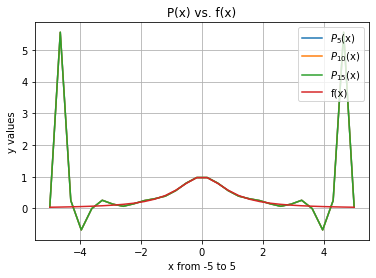

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x_array = np.linspace(-5, 5, 30)
p5_array = newtons_int(np.linspace(-5, 5, 5), 1 / (1 + np.linspace(-5, 5, 5)**2), x_array)
p10_array = newtons_int(np.linspace(-5, 5, 10), 1 / (1 + np.linspace(-5, 5, 10)**2), x_array)
p15_array = newtons_int(np.linspace(-5, 5, 15), 1 / (1 + np.linspace(-5, 5, 15)**2), x_array)
f_array = 1 / (1 + x_array**2)



plt.plot(x_array, p5_array, label = '$P_{5}$(x)')
plt.plot(x_array, p10_array, label = '$P_{10}$(x)')
plt.plot(x_array, p15_array, label = '$P_{15}$(x)')
plt.plot(x_array, f_array, label = 'f(x)')


plt.title('P(x) vs. f(x)')
plt.xlabel('x from -5 to 5')
plt.ylabel('y values')
plt.legend(loc='upper right')
 
plt.grid() 

plt.show()

We can observe what we were discussing earlier about the difference between $P_{n}(x)$ and $f(x)$ for any value of $n$ with plotting the error, $E_{n}(x)$, between them. When plotting $E_{n}(x)$ for each respective $n$ we will see the error oscillates a very small ammount from $0$ between $(-3.5,3.5)$. When $x = -5$ and $x = 5$, we will see that $E_{n}(x)$ takes a huge spike in error compared the values between $(-3.5,3.5)$. One could suggest that this is due to them being endpoints and their $P_{n}(x)$ values will not be represented from the Newton's Interpolating Polynomial.

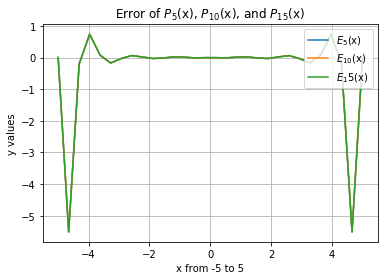

In [16]:
x_array = np.linspace(-5, 5, 30)
p5_array = newtons_int(np.linspace(-5, 5, 5), 1 / (1 + np.linspace(-5, 5, 5)**2), x_array)
p10_array = newtons_int(np.linspace(-5, 5, 10), 1 / (1 + np.linspace(-5, 5, 10)**2), x_array)
p15_array = newtons_int(np.linspace(-5, 5, 15), 1 / (1 + np.linspace(-5, 5, 15)**2), x_array)
f_array = 1 / (1 + x_array**2)

e5_array = f_array - p5_array
e10_array = f_array - p10_array
e15_array = f_array - p15_array

plt.plot(x_array, e5_array, label = '$E_5$(x)')
plt.plot(x_array, e10_array, label = '$E_{10}$(x)')
plt.plot(x_array, e15_array, label = '$E_15$(x)')



plt.title('Error of $P_{5}$(x), $P_{10}$(x), and $P_{15}$(x)')
plt.xlabel('x from -5 to 5')
plt.ylabel('y values')
plt.legend(loc='upper right')
 
plt.grid() 

plt.show()